In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cv19gm.models.seir_meta import SEIRMETA
import cv19gm.utils.cv19mobility as cv19mobility

# Meta-population SEIR model with 3 regions

## Build Mobility function

In [2]:
population = np.array([100000,200000,150000])
Phi = cv19mobility.create_dynamic_mobility(mobility_model='random', dynamic_pattern='sinusoidal', populations=population,seed=42, fraction=0.05)

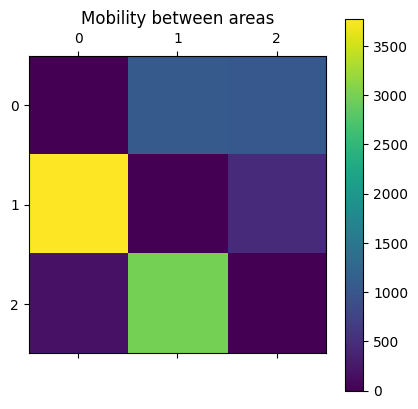

In [3]:
plt.matshow(Phi(0.34))
plt.title('Mobility between areas')
plt.colorbar()
plt.show()

In [4]:
beta = np.array([0.2,0.15,0.11])
mu = np.array([1,0.8,1.2])


I = np.array([1000,0,1500])
I_d = np.array([100,0,150])
R = np.array([5000,10000,7500])
I_ac = np.array([4500,9000,6500])

rR_S = 0

#E = False
#E_d = False
popfraction = 1  # np.array([1,1,1])

In [7]:
cfg = 'cfg/SEIRMETA.toml'

In [8]:
seir = SEIRMETA(config=cfg,beta=beta,mu=mu,population=population,I=I,I_d=I_d,R=R,I_ac=I_ac,Phi=Phi,rR_S=rR_S,t_end=500)
#seir = SEIRMETA(config=cfg,beta=beta,mu=mu,population=population,I=I,I_d=I_d,R=R,I_ac=I_ac,rR_S=rR_S,t_end=500)

In [9]:
seir.run()

In [10]:
seir.global_results

,t,S,E,E_d,I,I_d,R,R_d
0,0,422200,2800,280,2500,250,22500,0
1,1,421842,2617,330,2776,431,22764,168
2,2,421453,2496,369,2997,480,23053,245
3,3,421036,2421,400,3179,486,23362,286
4,4,420598,2380,425,3333,481,23688,312
...,...,...,...,...,...,...,...,...
495,495,190451,1,0,4,0,259542,0
496,496,190450,1,0,4,0,259543,0
497,497,190450,1,0,4,0,259543,0
498,498,190450,1,0,3,0,259544,0


In [11]:
seir.results

,t,S,E,E_d,I,I_d,R,R_d,alpha,beta,tE_I,tI_R,rR_S,node
0,0,93000,1000,100,1000,100,5000,0,1,0,5,10,0,0
1,1,92843,978,148,1075,149,5102,54,1,0,5,10,0,0
2,2,92678,971,173,1139,165,5211,77,1,0,5,10,0,0
3,3,92503,976,189,1196,170,5323,88,1,0,5,10,0,0
4,4,92318,988,201,1249,172,5438,94,1,0,5,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,495,63502,0,0,0,0,86326,179,1,0,5,10,0,2
1496,496,63501,0,0,0,0,86327,179,1,0,5,10,0,2
1497,497,63499,0,0,0,0,86329,179,1,0,5,10,0,2
1498,498,63498,0,0,0,0,86331,179,1,0,5,10,0,2


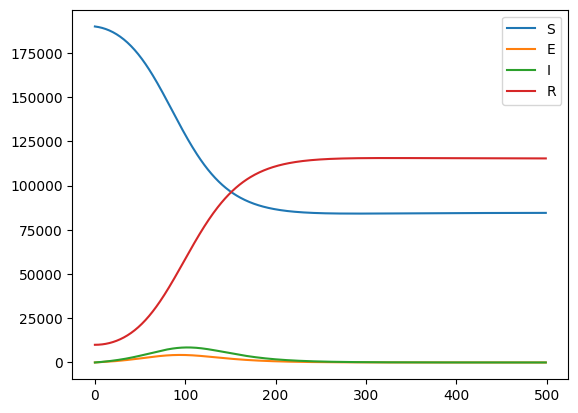

In [12]:
i = 1
plt.plot(seir.t,seir.S[i],label='S')
plt.plot(seir.t,seir.E[i],label='E')
plt.plot(seir.t,seir.I[i],label='I')
plt.plot(seir.t,seir.R[i],label='R')
plt.legend(loc=0)
plt.show()


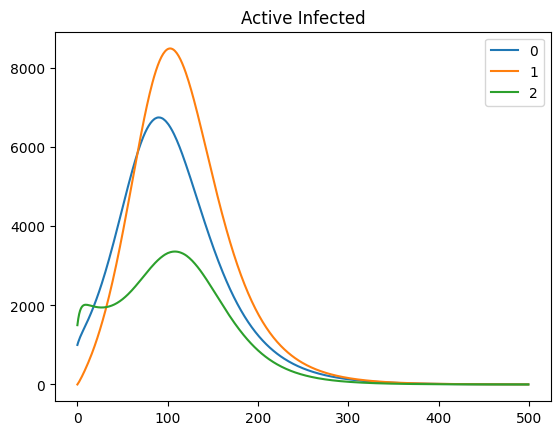

In [13]:
plt.plot(seir.t,seir.I[0],label='0')
plt.plot(seir.t,seir.I[1],label='1')
plt.plot(seir.t,seir.I[2],label='2')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()

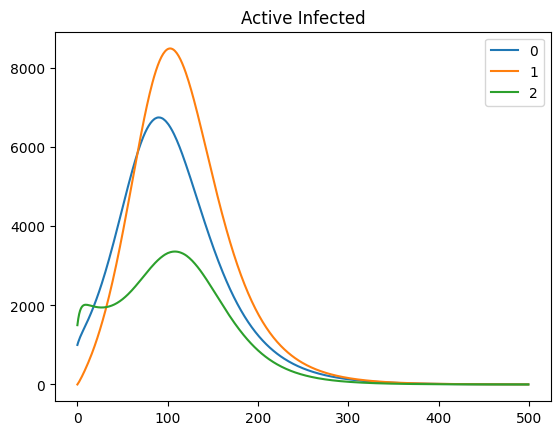

In [14]:
plt.plot(seir.t,seir.I[0],label='0')
plt.plot(seir.t,seir.I[1],label='1')
plt.plot(seir.t,seir.I[2],label='2')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()

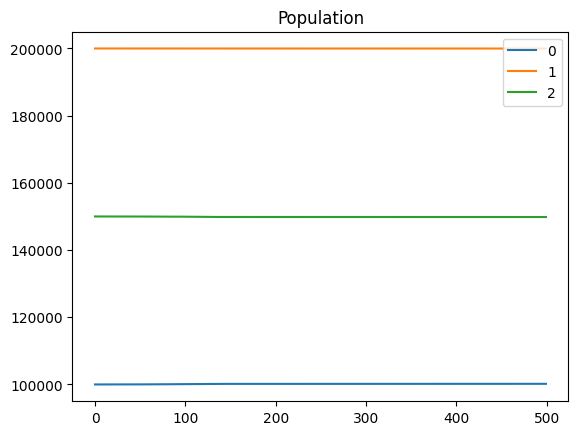

In [15]:
plt.plot(seir.t,seir.N[0],label='0')
plt.plot(seir.t,seir.N[1],label='1')
plt.plot(seir.t,seir.N[2],label='2')
plt.legend(loc=0)
plt.title('Population')
plt.show()

In [16]:
list(range(seir.nodes))

[0, 1, 2]

In [17]:

if seir.cfg['data']['state']:
    names = seir.cfg['data']['state']
elif seir.cfg['data']['county']:
    names = seir.cfg['data']['county']
else: 
    names = [str(i) for i in range(seir.nodes)]

In [18]:
names

['0', '1', '2']

## Output

In [19]:
seir.results

,t,S,E,E_d,I,I_d,R,R_d,alpha,beta,tE_I,tI_R,rR_S,node
0,0,93000,1000,100,1000,100,5000,0,1,0,5,10,0,0
1,1,92843,978,148,1075,149,5102,54,1,0,5,10,0,0
2,2,92678,971,173,1139,165,5211,77,1,0,5,10,0,0
3,3,92503,976,189,1196,170,5323,88,1,0,5,10,0,0
4,4,92318,988,201,1249,172,5438,94,1,0,5,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,495,63502,0,0,0,0,86326,179,1,0,5,10,0,2
1496,496,63501,0,0,0,0,86327,179,1,0,5,10,0,2
1497,497,63499,0,0,0,0,86329,179,1,0,5,10,0,2
1498,498,63498,0,0,0,0,86331,179,1,0,5,10,0,2


In [20]:
seir.parameters

{'static': {'t_init': 0,
  't_end': 500,
  'k_I': 0,
  'k_R': 0,
  'mu': [1.5, 1.5, 1.5],
  'pI_det': 1},
 'dynamic': {'beta': [0.1, 0.1, 0.1],
  'alpha': [1, 1, 1],
  'tE_I': 5.0,
  'tI_R': 10.0,
  'rR_S': 0}}

In [21]:
np.shape(seir.S.sum(axis=0))

(500,)

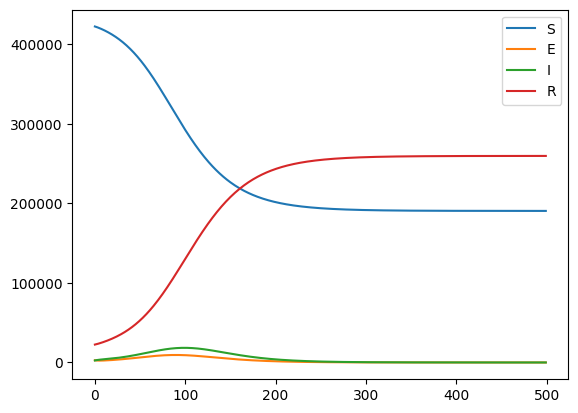

In [22]:
plt.plot(seir.t,seir.S.sum(axis=0),label='S')
plt.plot(seir.t,seir.E.sum(axis=0),label='E')
plt.plot(seir.t,seir.I.sum(axis=0),label='I')
plt.plot(seir.t,seir.R.sum(axis=0),label='R')
plt.legend(loc=0)
plt.show()

In [23]:
aux = {}
for i in range(seir.nodes):
    aux[str(i)] = seir.results.loc[seir.results['node']==i].to_dict('list')

# With configuration file

In [24]:
cfg = 'cfg/SEIRMETA.toml'

In [25]:
seir2 = SEIRMETA(config=cfg)

In [26]:
seir2.solve()

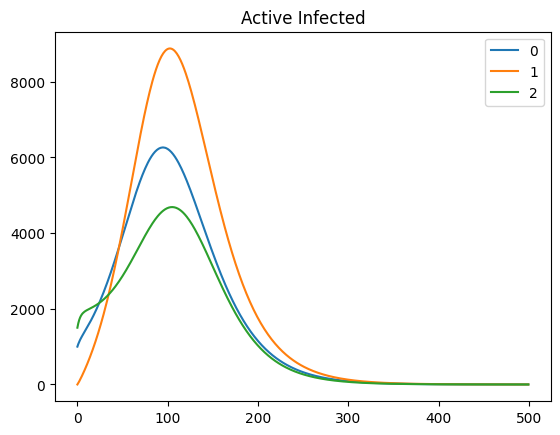

In [27]:
plt.plot(seir2.t,seir2.I[0],label='0')
plt.plot(seir2.t,seir2.I[1],label='1')
plt.plot(seir2.t,seir2.I[2],label='2')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()

In [28]:
seir2.results

,t,S,E,E_d,I,I_d,R,R_d,alpha,beta,tE_I,tI_R,rR_S,node
0,0,93000,1000,99,1000,100,5000,0,1,0,5,10,0,0
1,1,92853,972,143,1069,144,5102,46,1,0,5,10,0,0
2,2,92697,961,166,1128,157,5208,65,1,0,5,10,0,0
3,3,92537,961,181,1179,161,5318,74,1,0,5,10,0,0
4,4,92371,968,192,1226,162,5431,79,1,0,5,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,495,59592,0,0,0,0,90417,238,1,0,5,10,0,2
1496,496,59593,0,0,0,0,90418,238,1,0,5,10,0,2
1497,497,59592,0,0,0,0,90418,238,1,0,5,10,0,2
1498,498,59592,0,0,0,0,90418,238,1,0,5,10,0,2


In [29]:
seir2.params

AttributeError: 'SEIRMETA' object has no attribute 'params'

In [ ]:
seir2.nodes

In [ ]:
seir2.results

In [ ]:
aux = {}
for i in range(seir2.nodes):
    aux[str(i)] = seir2.results.loc[seir2.results['node']==i].to_dict()

In [ ]:
import json

In [ ]:
json.dumps(aux)

In [ ]:
def radiation_model(populations, distances, fraction=0.2, **kwargs):
    """Calculate the radiation model mobility matrix.

    Args:
        populations (np.array): Array of populations for each region.
        distances (np.array): Matrix of distances between regions.
        fraction (float, optional): Fraction of the population that travels per day. Defaults to 0.5.

    Returns:
        np.array: Mobility matrix based on the radiation model.
    """
    num_regions = len(populations)
    mobility_matrix = np.zeros((num_regions, num_regions))

    for i in range(num_regions):
        for j in range(num_regions):
            if i != j:
                s_ij = populations[i] * populations[j]
                m_ij = (s_ij * distances[i, j]) / ((populations[i] + s_ij) * (populations[i] + populations[j] + distances[i, j] - s_ij))
                mobility_matrix[i, j] = m_ij

    # Normalize rows to prevent the total outgoing flux from exceeding the population
    row_sums = mobility_matrix.sum(axis=1, keepdims=True)
    mobility_matrix = mobility_matrix / row_sums * populations[:, np.newaxis] * fraction
    
    return mobility_matrix.astype(int)


In [ ]:
radiation_model(populations=population, distances=cv19mobility.create_random_distances_matrix(3,seed=42), fraction=0.1)

In [ ]:
population = np.array([100000, 200000, 150000])
seed = 42
distances = cv19mobility.create_random_distances_matrix(len(population), seed=seed)
mobility_matrix = radiation_model(population, distances)
print(mobility_matrix)
